In [ ]:
model3 = load_model(os.path.join(OUTPUT_PATH, '2019-10-15\\+model_weights.01-0.000275.hdf5'))

In [34]:
pred_df[['SECID', 'Open', 'High', 'Low', 'Close', 'Close_pred_best']].head(200)

,SECID,Open,High,Low,Close,Close_pred_best
TRADEDATE,,,,,,
2019-08-05,GAZP,226.00,228.00,222.30,223.61,None
2019-08-06,GAZP,223.62,227.78,223.62,226.76,None
2019-08-07,GAZP,226.90,232.67,225.50,227.67,None
2019-08-08,GAZP,230.51,233.54,230.43,231.21,None
2019-08-09,GAZP,231.45,232.26,228.91,229.96,None
2019-08-12,GAZP,231.06,232.97,229.29,230.24,None
2019-08-13,GAZP,229.88,232.16,226.46,229.87,None
2019-08-14,GAZP,231.10,231.19,224.58,227.10,None
2019-08-15,GAZP,227.69,229.70,224.89,227.15,None


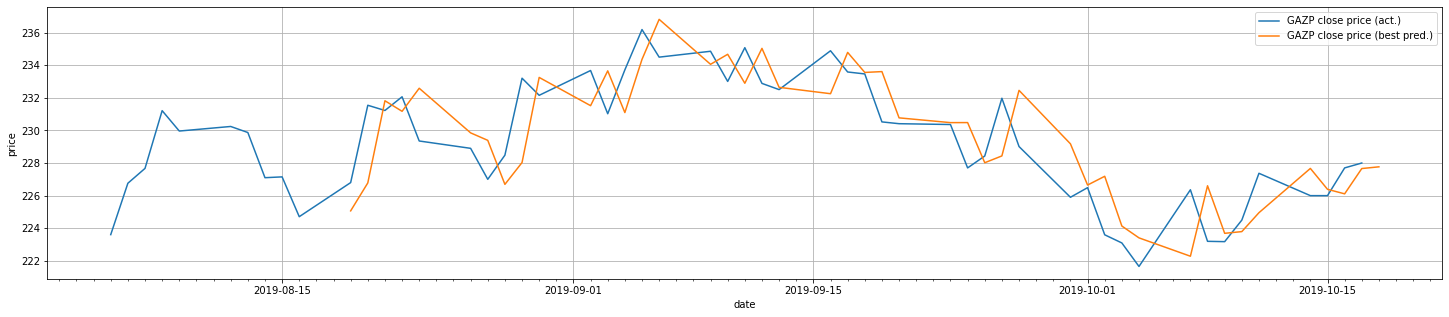

In [35]:
plt.figure(figsize=(25, 5))
ax = plt.axes()
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.plot(pred_df.index, pred_df[['Close']], label='{} close price (act.)'.format(pred_ticker))
#plt.plot(pred_df.index, pred_df[['Close_pred']], label='{} close price (pred.)'.format(pred_ticker))
plt.plot(pred_df.index, pred_df[['Close_pred_best']], label='{} close price (best pred.)'.format(pred_ticker))
plt.xlabel('date')
plt.ylabel('price')
plt.grid(True)
plt.legend()
plt.show()

In [36]:
print('RMSE: {:.6f}'.format(np.sqrt(mean_squared_error(pred_df[deep_look:-1][['Close_pred_best']].values[:, 0], pred_df[deep_look:-1][['Close']].values[:, 0]))))

RMSE: 2.302755
